(Sistema 1) Uma barra de massa $M$ e cuja posição do centro é $x$ pode se mover sobre um apoio sujeita a um atrito. Em uma ceta posição $x_1$ há um pêndulo de comprimento $l$ e massa $m$ deslocado de um ângulo $\theta_1$. Mais a frente em uma posição $x_2$ há outro pêndulo de comprimento $l$ e massa $m$ deslocado de um ângulo $\theta_2$. Considere $d$ como a distância entre as posições de cada pêndulo ao centro da barra.

Equação da barra: $\ddot x (M + 2m) - \mu \dot x - ml(\ddot \theta_1 \cos(\theta_1) - \dot \theta_1^2 \sin(\theta_1) + \ddot \theta_2 \cos(\theta_2) - \dot \theta_2^2 \sin(\theta_2)) = 0$

Equação do pêndulo 1: $\ddot x \cos(\theta_1) - g \sin(\theta_1) - l \ddot \theta_1 = 0$

Equação do pêndulo 2: $\ddot x \cos(\theta_2) - g \sin(\theta_2) - l \ddot \theta_2 = 0$

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

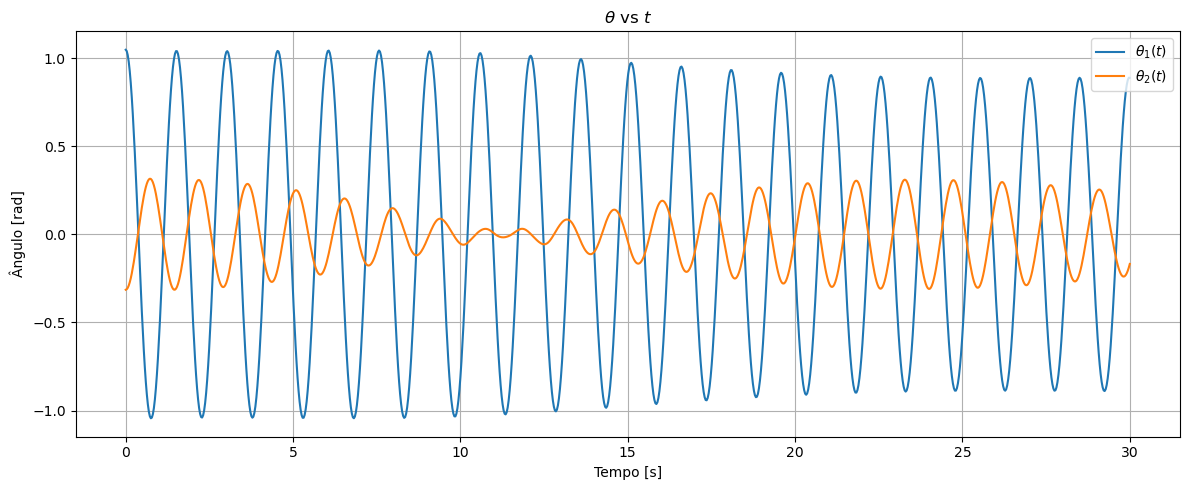

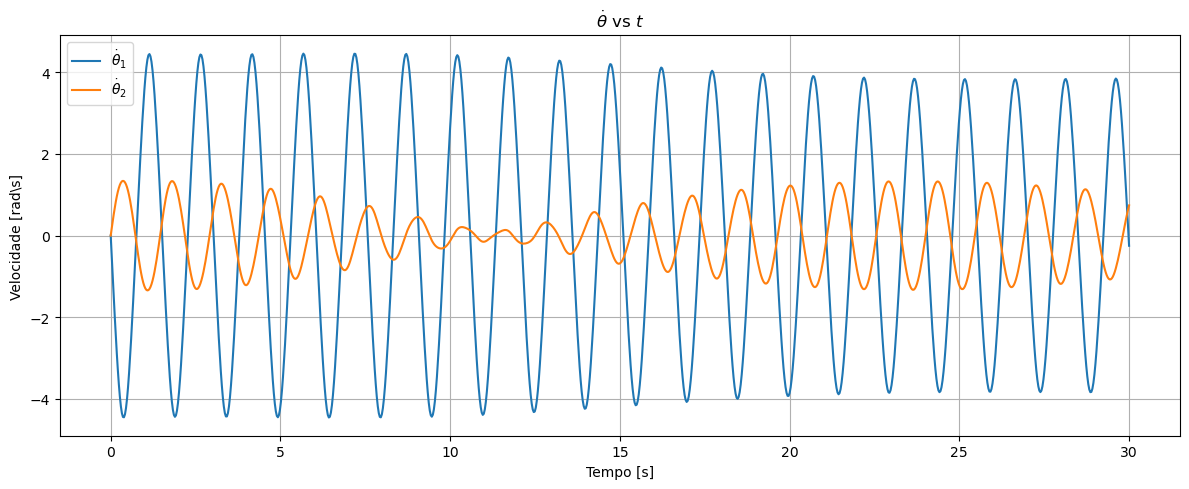

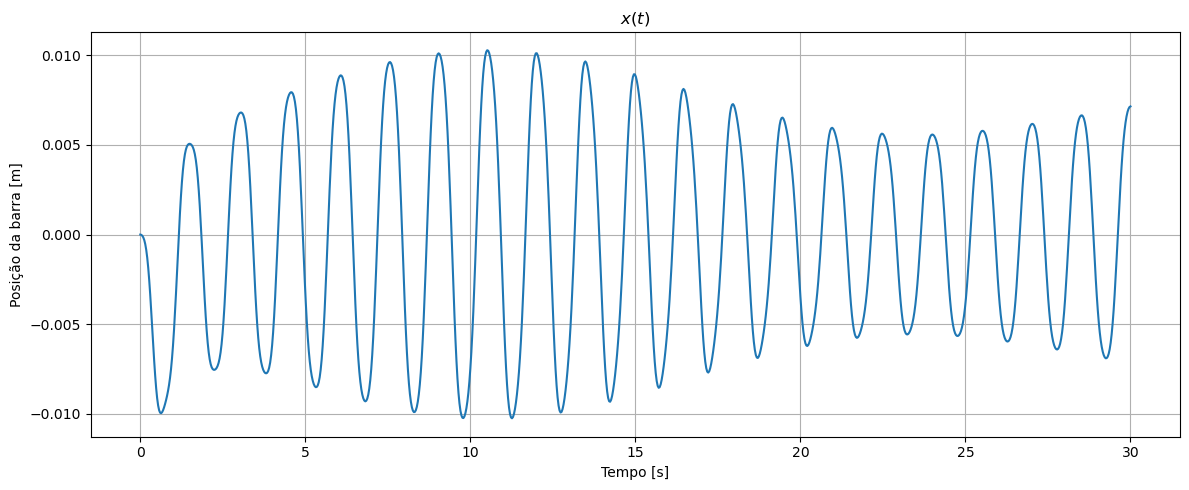

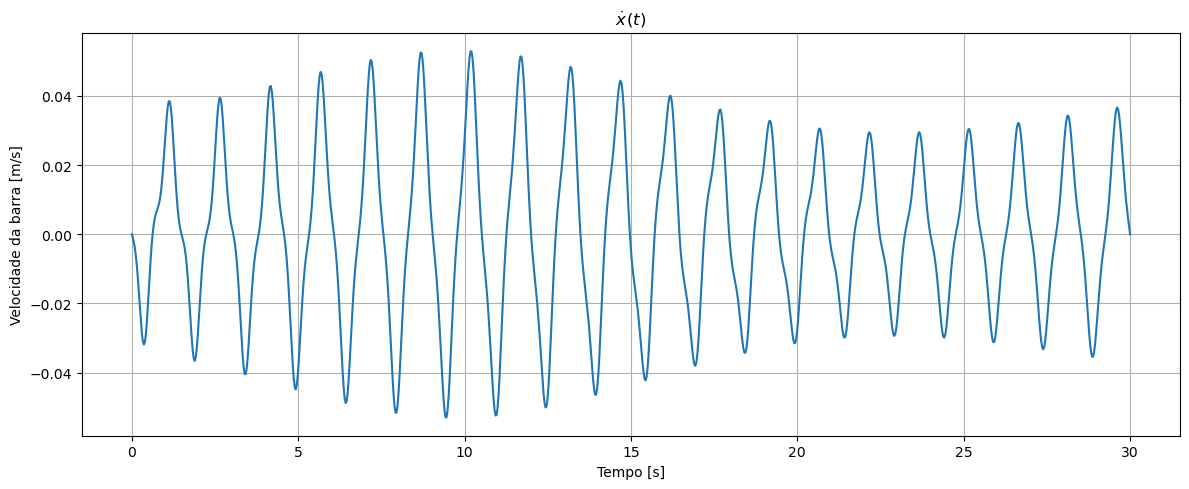

In [33]:
#parametros

M = 4
m = 0.1
l = 0.5
d = 0.5
mu = 4
g = 9.8

def sistema1(y, t):                             
    x, v, theta1, omega1, theta2, omega2 = y

    dx = v
    dtheta1 = omega1
    dtheta2 = omega2

    #equação da barra
    dv = (
        -mu*v - m*g*np.sin(theta1)*np.cos(theta1) -       #atrito negativo
        m*l*omega1**2*np.sin(theta1) - 
        m*g*np.sin(theta2)*np.cos(theta2) -
        m*l*omega2**2*np.sin(theta2)
    ) / (M + 2 * m - m*np.cos(theta1)**2 - m*np.cos(theta2)**2)

    #equação dos pendulos
    domega1 = (dv*np.cos(theta1) - g*np.sin(theta1))/l
    domega2 = (dv*np.cos(theta2) - g*np.sin(theta2))/l

    return [dx, dv, dtheta1, domega1, dtheta2, domega2]

#condições iniciais
x0 = 0
v0 = 0
theta1_0 = np.pi/3  
omega1_0 = 0
theta2_0 = -np.pi/10
omega2_0 = 0

y0 = [x0, v0, theta1_0, omega1_0, theta2_0, omega2_0]

t = np.linspace(0, 30, 1000)

#solução
sol = odeint(sistema1, y0, t)     # ---> odeint só resolve EDO de primeiro grau


#grafico angulos X tempo

plt.figure(figsize=(12, 5))
plt.plot(t, sol[:, 2] , label=r'$\theta_1(t)$')
plt.plot(t, sol[:, 4], label=r'$\theta_2(t)$')
plt.xlabel('Tempo [s]')
plt.ylabel('Ângulo [rad]')
plt.title(r'$\theta$ vs $t$')
plt.legend()
plt.grid(True)
plt.tight_layout()


#grafico velocidades angulares X tempo

plt.figure(figsize=(12, 5))
plt.plot(t, sol[:, 3], label=r'$\dot \theta_1$')
plt.plot(t, sol[:, 5], label=r'$\dot \theta_2$')
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade [rad\s]')
plt.title(r'$\dot\theta$ vs $t$')
plt.legend()
plt.grid(True)
plt.tight_layout()

#grafico posição da barra X tempo

plt.figure(figsize=(12, 5))
plt.plot(t, sol[:, 0])
plt.xlabel('Tempo [s]')
plt.ylabel('Posição da barra [m]')
plt.title(r'$x(t)$')
plt.grid(True)
plt.tight_layout()

#grafico velocidade da barra

plt.figure(figsize=(12, 5))
plt.plot(t, sol[:, 1])
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade da barra [m/s]')
plt.title(r'$\dot x(t)$')
plt.grid(True)
plt.tight_layout()

plt.show()


(Sistema 2) Dois pêndulos de massa $m$ e comrimento $l$ estão fixo em uma barra fixa nas posições $x_1$ e $x_2$ e distantes um do outro por um comprimento $d$. Suas massas estão conectadas por uma mola de constante $k$ tamanho $L$ quando deformada. Ao se movimentarem, a mola fica sujeita a um certo atrito, de coeficiente $\beta$, por "raspar" na parede.

Equação do pêndulo 1: $\beta l [\dot \theta_2 \cos(\theta_2) - \dot \theta_1 \cos(\theta_1)] - m g l \sin(\theta_1) + k l^2 \cos(\theta_1) [\sin(\theta_2) - \sin(\theta_1)] - m l^2 \ddot \theta_1 = 0$

Equação do pêndulo 2: $\beta l [\dot \theta_2 \cos(\theta_2) - \dot \theta_1 \cos(\theta_1)] - m g l \sin(\theta_1) - k l^2 \cos(\theta_1) [\sin(\theta_2) - \sin(\theta_1)] - m l^2 \ddot \theta_1 = 0$

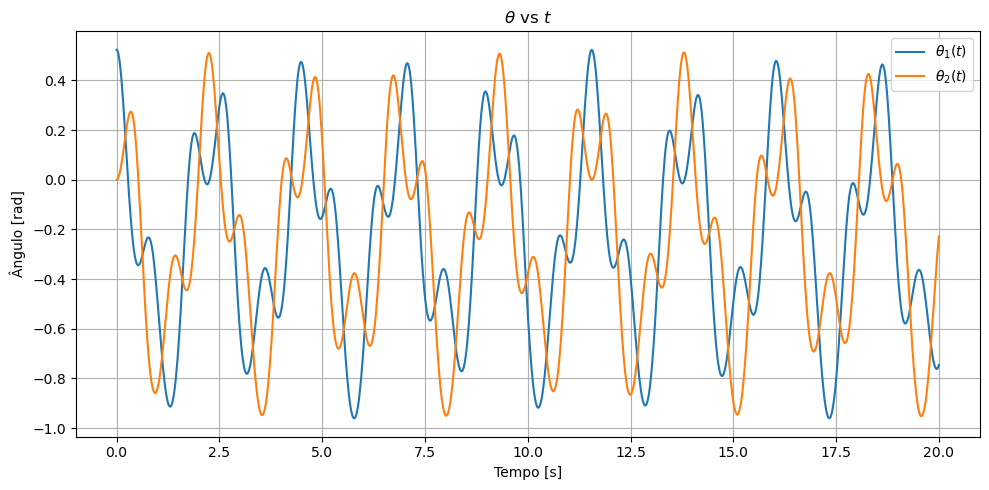

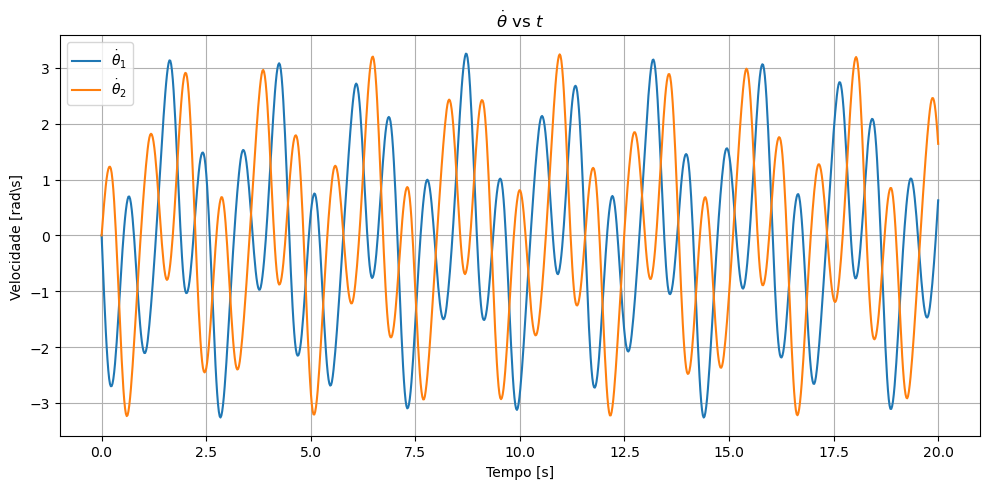

In [11]:
#parametros

m = 0.2
l = 1
d = 0.5
beta = 1
k = 5
g = 9.8

def sistema2(y, t):
    theta1, omega1, theta2, omega2 = y

    dtheta1 = omega1
    dtheta2 = omega2

    #equação dos pendulos
    domega1 = (
             -beta*l*abs(theta1 - theta2) +
             k*l**2*np.cos(theta1)*(np.sin(theta2) - np.sin(theta1)) -
             m*g*l*np.sin(theta1)
    )/(m*l**2)
    
    domega2 = (
             -beta*l*abs(theta1 - theta2) -
             k*l**2*np.cos(theta2)*(np.sin(theta2) - np.sin(theta1)) -
             m*g*l*np.sin(theta2)
    )/(m*l**2)

    return [dtheta1, domega1, dtheta2, domega2]

#condições iniciais
theta1_0 = np.pi/6
omega1_0 = 0
theta2_0 = 0
omega2_0 = 0

y0 = [theta1_0, omega1_0, theta2_0, omega2_0]

t = np.linspace(0, 20, 1000)

#solução
sol = odeint(sistema2, y0, t)


#grafico angulos X tempo

plt.figure(figsize=(10, 5))
plt.plot(t, sol[:, 0], label=r'$\theta_1(t)$')
plt.plot(t, sol[:, 2], label=r'$\theta_2(t)$')
plt.xlabel('Tempo [s]')
plt.ylabel('Ângulo [rad]')
plt.title(r'$\theta$ vs $t$')
plt.legend()
plt.grid(True)
plt.tight_layout()


#grafico velocidades angulares X tempo

plt.figure(figsize=(10, 5))
plt.plot(t, sol[:, 1], label=r'$\dot \theta_1$')
plt.plot(t, sol[:, 3], label=r'$\dot \theta_2$')
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade [rad\s]')
plt.title(r'$\dot\theta$ vs $t$')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
